<a href="https://colab.research.google.com/github/miguellucero123/Analisis_est/blob/main/Coolabconexion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Ruta al archivo
path = '/content/drive/MyDrive/Analisis_estadistico_data/datos_supermercadousa.csv'

# Leer el archivo en formato de texto bruto
df_raw = pd.read_csv(path, sep=';', encoding='latin1', dtype=str)

# Mostrar las primeras filas del DataFrame en bruto
print("Primeras filas del DataFrame original (en bruto):")
display(df_raw.head())

# Función para convertir correctamente los valores numéricos
def fix_numeric_format(value):
    if not isinstance(value, str):
        return value

    # Si el valor tiene un punto (separador de miles) y una coma (decimales)
    if '.' in value and ',' in value:
        # Formato español: 1.234,56
        return float(value.replace('.', '').replace(',', '.'))

    # Si solo tiene punto (puede ser separador decimal en formato inglés o separador de miles)
    elif '.' in value:
        # Verificar si es un separador de miles (por ejemplo 5.489.715)
        if value.count('.') > 1:
            # Esto es un separador de miles, eliminarlos
            return float(value.replace('.', ''))
        # Si solo hay un punto, lo tratamos como separador decimal
        return float(value)

    # Si solo tiene coma (puede ser separador decimal)
    elif ',' in value:
        return float(value.replace(',', '.'))

    # Si no tiene separadores, intentar convertir directamente
    try:
        return float(value)
    except:
        return value

# Crear un DataFrame temporal para procesar los datos
df_temp = df_raw.copy()

# Procesar las columnas numéricas
columnas_numericas = ['Precio por unidad', 'Canrtidad', 'Impuesto 5%', 'Total',
                     'cogs', 'Margen bruto', 'Ingreso bruto', 'Rating']

for col in columnas_numericas:
    if col in df_temp.columns:
        df_temp[col] = df_temp[col].apply(fix_numeric_format)
        print(f"Columna {col}: Convertida a float")

# Convertir fechas
if 'Fecha' in df_temp.columns:
    df_temp['Fecha'] = pd.to_datetime(df_temp['Fecha'], format='%d/%m/%Y', errors='coerce')
    print("Columna Fecha: Convertida a datetime")

if 'Tiempo' in df_temp.columns:
    try:
        df_temp['Tiempo'] = pd.to_datetime(df_temp['Tiempo'], format='%H:%M').dt.time
        print("Columna Tiempo: Convertida a time")
    except:
        print("Columna Tiempo: Se mantiene como string")

# Calcular columnas correctas
df_temp['Impuesto_Calculado'] = df_temp['cogs'] * 0.05
df_temp['Total_Calculado'] = df_temp['cogs'] + df_temp['Impuesto_Calculado']
df_temp['Ingreso_bruto_Calculado'] = df_temp['cogs'] * 0.05

# Verificar los cálculos para la primera fila
primera_fila = df_temp.iloc[0]
print("\nVerificación de cálculos para la primera fila:")
print(f"Precio por unidad: {primera_fila['Precio por unidad']}")
print(f"Cantidad: {primera_fila['Canrtidad']}")
print(f"Valor base (cogs): {primera_fila['cogs']}")
print(f"Impuesto 5% (original): {primera_fila['Impuesto 5%']}")
print(f"Impuesto 5% (calculado): {primera_fila['Impuesto_Calculado']}")
print(f"Total (original): {primera_fila['Total']}")
print(f"Total (calculado): {primera_fila['Total_Calculado']}")
print(f"Ingreso bruto (original): {primera_fila['Ingreso bruto']}")
print(f"Ingreso bruto (calculado): {primera_fila['Ingreso_bruto_Calculado']}")

# CREACIÓN DEL DATAFRAME LIMPIO
# Primero, identificamos las columnas que queremos mantener tal cual
columnas_a_mantener = [col for col in df_temp.columns if col not in
                       ['Impuesto 5%', 'Total', 'Ingreso bruto',
                        'Impuesto_Calculado', 'Total_Calculado', 'Ingreso_bruto_Calculado']]

Primeras filas del DataFrame original (en bruto):


,Invoice ID,Sucursal,Ciudad,Tipo de comprador,Género,Linea de producto,Precio por unidad,Canrtidad,Impuesto 5%,Total,Fecha,Tiempo,Tipo de pago,cogs,Margen bruto,Ingreso bruto,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,261.415,5.489.715,01/05/2019,13:08,Ewallet,522.83,4.761.904.762,261.415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,03/08/2019,10:29,Cash,76.4,4.761.904.762,3.82,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,162.155,3.405.255,03/03/2019,13:23,Credit card,324.31,4.761.904.762,162.155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.288,489.048,1/27/2019,20:33,Ewallet,465.76,4.761.904.762,23.288,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,302.085,6.343.785,02/08/2019,10:37,Ewallet,604.17,4.761.904.762,302.085,5.3


Columna Precio por unidad: Convertida a float
Columna Canrtidad: Convertida a float
Columna Impuesto 5%: Convertida a float
Columna Total: Convertida a float
Columna cogs: Convertida a float
Columna Margen bruto: Convertida a float
Columna Ingreso bruto: Convertida a float
Columna Rating: Convertida a float
Columna Fecha: Convertida a datetime
Columna Tiempo: Convertida a time

Verificación de cálculos para la primera fila:
Precio por unidad: 74.69
Cantidad: 7.0
Valor base (cogs): 522.83
Impuesto 5% (original): 261.415
Impuesto 5% (calculado): 26.141500000000004
Total (original): 5489715.0
Total (calculado): 548.9715
Ingreso bruto (original): 261.415
Ingreso bruto (calculado): 26.141500000000004


In [ ]:
# Crear el DataFrame limpio
df_clean = df_temp[columnas_a_mantener].copy()

# Agregar las columnas calculadas con nombres limpios
df_clean['Impuesto'] = df_temp['Impuesto_Calculado']
df_clean['Total'] = df_temp['Total_Calculado']
df_clean['Ingreso_bruto'] = df_temp['Ingreso_bruto_Calculado']

In [ ]:
# Después de crear df_clean y antes del análisis estadístico:

#=============================================
# LIMPIEZA DE DATOS
#=============================================
print("\n=========== LIMPIEZA DE DATOS ===========")

# 1. Verificar valores nulos
print("\n1. Verificando valores nulos:")
valores_nulos = df_clean.isnull().sum()
print(valores_nulos)

if valores_nulos.sum() > 0:
    print(f"Se encontraron {valores_nulos.sum()} valores nulos en total.")

    # Verificar qué columnas tienen valores nulos
    columnas_con_nulos = valores_nulos[valores_nulos > 0].index.tolist()
    print(f"Columnas con valores nulos: {columnas_con_nulos}")

    # Eliminar filas con valores nulos
    filas_antes = len(df_clean)
    df_clean = df_clean.dropna()
    filas_eliminadas = filas_antes - len(df_clean)
    print(f"Se eliminaron {filas_eliminadas} filas con valores nulos.")
    print(f"Filas restantes: {len(df_clean)}")
else:
    print("No se encontraron valores nulos en el DataFrame.")

# 2. Verificar y eliminar duplicados
print("\n2. Verificando duplicados:")
duplicados = df_clean.duplicated().sum()
print(f"Se encontraron {duplicados} filas duplicadas.")

if duplicados > 0:
    # Mostrar un ejemplo de fila duplicada si existe
    if duplicados > 0:
        print("\nEjemplo de fila duplicada:")
        display(df_clean[df_clean.duplicated(keep='first')].head(1))

    # Eliminar duplicados
    filas_antes = len(df_clean)
    df_clean = df_clean.drop_duplicates()
    filas_eliminadas = filas_antes - len(df_clean)
    print(f"Se eliminaron {filas_eliminadas} filas duplicadas.")
    print(f"Filas restantes: {len(df_clean)}")

# 3. Resumen después de la limpieza
print("\n3. Resumen después de la limpieza:")
print(f"Dimensiones del DataFrame limpio: {df_clean.shape}")
print(f"Filas: {df_clean.shape[0]}, Columnas: {df_clean.shape[1]}")

# Verificar que no queden valores nulos ni duplicados
nulos_restantes = df_clean.isnull().sum().sum()
duplicados_restantes = df_clean.duplicated().sum()

print(f"Valores nulos restantes: {nulos_restantes}")
print(f"Filas duplicadas restantes: {duplicados_restantes}")

# Mostrar las primeras filas del DataFrame limpio
print("\nPrimeras filas del DataFrame limpio después de eliminar nulos y duplicados:")
display(df_clean.head())


=========== LIMPIEZA DE DATOS ===========

1. Verificando valores nulos:
Invoice ID             0
Sucursal               0
Ciudad                 0
Tipo de comprador      0
Género                 0
Linea de producto      0
Precio por unidad      0
Canrtidad              0
Fecha                587
Tiempo                 0
Tipo de pago           0
cogs                   0
Margen bruto           0
Rating                 0
Impuesto               0
Total                  0
Ingreso_bruto          0
dtype: int64
Se encontraron 587 valores nulos en total.
Columnas con valores nulos: ['Fecha']
Se eliminaron 587 filas con valores nulos.
Filas restantes: 413

2. Verificando duplicados:
Se encontraron 0 filas duplicadas.

3. Resumen después de la limpieza:
Dimensiones del DataFrame limpio: (413, 17)
Filas: 413, Columnas: 17
Valores nulos restantes: 0
Filas duplicadas restantes: 0

Primeras filas del DataFrame limpio después de eliminar nulos y duplicados:


,Invoice ID,Sucursal,Ciudad,Tipo de comprador,Género,Linea de producto,Precio por unidad,Canrtidad,Fecha,Tiempo,Tipo de pago,cogs,Margen bruto,Rating,Impuesto,Total,Ingreso_bruto
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,2019-05-01,13:08:00,Ewallet,522.83,4.761905e+09,9.1,26.1415,548.9715,26.1415
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,2019-08-03,10:29:00,Cash,76.40,4.761905e+09,9.6,3.8200,80.2200,3.8200
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,2019-03-03,13:23:00,Credit card,324.31,4.761905e+09,7.4,16.2155,340.5255,16.2155
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,2019-08-02,10:37:00,Ewallet,604.17,4.761905e+09,5.3,30.2085,634.3785,30.2085
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2.0,2019-10-01,17:15:00,Credit card,72.52,4.761905e+09,7.2,3.6260,76.1460,3.6260


In [ ]:
df_clean = df_clean.rename(columns={'Canrtidad': 'Cantidad', 'Margen bruto': 'Margen_bruto', 'Ingreso bruto': 'Ingreso_bruto',
                                    'Tiempo': 'Hora', 'Rating': 'Calificacion', 'Linea de producto': 'Linea_de_producto',
                                    'Precio por unidad': 'Precio_por_unidad', 'Impuesto 5%': 'Impuesto', 'Total': 'Total',
                                    'cogs': 'Coste_de_produccion','Invoice ID': 'Factura_ID'})
# Verificar el DataFrame limpio
print("\nEstructura del DataFrame limpio:")
print(df_clean.info())

print("\nPrimeras filas del DataFrame limpio:")
display(df_clean.head())

# Verificar los datos numéricos en el DataFrame limpio
print("\nEstadísticas descriptivas de las columnas numéricas del DataFrame limpio:")
display(df_clean.describe())


Estructura del DataFrame limpio:
<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 997
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Factura_ID           413 non-null    object        
 1   Sucursal             413 non-null    object        
 2   Ciudad               413 non-null    object        
 3   Tipo de comprador    413 non-null    object        
 4   Género               413 non-null    object        
 5   Linea_de_producto    413 non-null    object        
 6   Precio_por_unidad    413 non-null    float64       
 7   Cantidad             413 non-null    float64       
 8   Fecha                413 non-null    datetime64[ns]
 9   Hora                 413 non-null    object        
 10  Tipo de pago         413 non-null    object        
 11  Coste_de_produccion  413 non-null    float64       
 12  Margen_bruto         413 non-null    float64       
 13  Califi

,Factura_ID,Sucursal,Ciudad,Tipo de comprador,Género,Linea_de_producto,Precio_por_unidad,Cantidad,Fecha,Hora,Tipo de pago,Coste_de_produccion,Margen_bruto,Calificacion,Impuesto,Total,Ingreso_bruto
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,2019-05-01,13:08:00,Ewallet,522.83,4.761905e+09,9.1,26.1415,548.9715,26.1415
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,2019-08-03,10:29:00,Cash,76.40,4.761905e+09,9.6,3.8200,80.2200,3.8200
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,2019-03-03,13:23:00,Credit card,324.31,4.761905e+09,7.4,16.2155,340.5255,16.2155
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,2019-08-02,10:37:00,Ewallet,604.17,4.761905e+09,5.3,30.2085,634.3785,30.2085
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2.0,2019-10-01,17:15:00,Credit card,72.52,4.761905e+09,7.2,3.6260,76.1460,3.6260



Estadísticas descriptivas de las columnas numéricas del DataFrame limpio:


,Precio_por_unidad,Cantidad,Fecha,Coste_de_produccion,Margen_bruto,Calificacion,Impuesto,Total,Ingreso_bruto
count,413.000000,413.000000,413,413.000000,4.130000e+02,413.000000,413.000000,413.000000,413.000000
mean,53.958596,5.677966,2019-06-15 02:15:58.837772544,312.130194,4.761905e+09,7.021308,15.606510,327.736703,15.606510
min,10.130000,1.000000,2019-01-01 00:00:00,10.170000,4.761905e+09,4.000000,0.508500,10.678500,0.508500
25%,30.240000,3.000000,2019-03-03 00:00:00,121.740000,4.761905e+09,5.600000,6.087000,127.827000,6.087000
50%,51.520000,6.000000,2019-06-03 00:00:00,243.000000,4.761905e+09,7.000000,12.150000,255.150000,12.150000
75%,75.880000,8.000000,2019-09-03 00:00:00,454.800000,4.761905e+09,8.500000,22.740000,477.540000,22.740000
max,99.960000,10.000000,2019-12-03 00:00:00,989.800000,4.761905e+09,10.000000,49.490000,1039.290000,49.490000
std,26.148675,2.928836,NaN,239.579937,0.000000e+00,1.691966,11.978997,251.558934,11.978997


In [ ]:
print("\n\nREALIZANDO ANÁLISIS ESTADÍSTICO CON EL DATAFRAME df_clean:")
print("=========================================================")

# 1) Media de la columna de Impuesto
media_impuesto = df_clean['Impuesto'].mean()

print(f"\n1) Media de la columna 'Impuesto': {media_impuesto:.4f}")
print("\nExplicación:")
print("La media aritmética se calcula sumando todos los valores de la columna 'Impuesto'")
print("y dividiendo el resultado entre el número total de datos.")
print(f"Suma de todos los impuestos: {df_clean['Impuesto'].sum():.4f}")
print(f"Número de datos: {len(df_clean['Impuesto'])}")
print(f"Media = Suma / Número de datos = {df_clean['Impuesto'].sum():.4f} / {len(df_clean['Impuesto'])} = {media_impuesto:.4f}")



REALIZANDO ANÁLISIS ESTADÍSTICO CON EL DATAFRAME df_clean:

1) Media de la columna 'Impuesto': 15.6065

Explicación:
La media aritmética se calcula sumando todos los valores de la columna 'Impuesto'
y dividiendo el resultado entre el número total de datos.
Suma de todos los impuestos: 6445.4885
Número de datos: 413
Media = Suma / Número de datos = 6445.4885 / 413 = 15.6065


In [ ]:
# 2) Mediana de la columna Impuesto
mediana_impuesto = df_clean['Impuesto'].median()

print(f"\n2) Mediana de la columna 'Impuesto': {mediana_impuesto:.4f}")
print("\nSentencias para obtener el 50% de los datos ordenados:")
print("df_clean['Impuesto'].median()")
print("# O también:")
print("df_clean['Impuesto'].quantile(0.5)")
print("# O también usando numpy:")
print("np.median(df_clean['Impuesto'])")


2) Mediana de la columna 'Impuesto': 12.1500

Sentencias para obtener el 50% de los datos ordenados:
df_clean['Impuesto'].median()
# O también:
df_clean['Impuesto'].quantile(0.5)
# O también usando numpy:
np.median(df_clean['Impuesto'])


In [ ]:
# 3) Moda de la Línea de Producto
moda_linea = df_clean['Linea_de_producto'].mode()[0]
conteo_moda = df_clean['Linea_de_producto'].value_counts().iloc[0]

print(f"\n3) Moda de 'Linea_de_producto': {moda_linea}")
print(f"Esta línea aparece {conteo_moda} veces en el dataset.")


3) Moda de 'Linea_de_producto': Home and lifestyle
Esta línea aparece 75 veces en el dataset.


In [ ]:
# 4) Tercer cuartil (75%) de la columna Total
q3_total = df_clean['Total'].quantile(0.75)

#print(f"\n4) ¿Cuál es el valor que corta el 75% de los datos en la columna 'Total' ordenados de menor a mayor?")
print(f"El valor que corta el 75% de los datos (tercer cuartil) es: {q3_total:.4f}")
print("\nExplicación:")
print("Para encontrar este valor, primero ordenamos todos los datos de la columna 'Total' de menor a mayor.")
print("Luego identificamos el valor por debajo del cual se encuentra el 75% de los datos.")
print("Este valor es conocido como el tercer cuartil (Q3) o el percentil 75.")
print("\nPara calcularlo, usamos la función quantile() con el parámetro 0.75:")
print("df_clean['Total'].quantile(0.75)")

# Valores ordenados para verificar
total_ordenado = sorted(df_clean['Total'])
print(f"\nTotal de valores en la columna 'Total': {len(total_ordenado)}")
print(f"Posición del valor que corta el 75% de los datos: {int(len(total_ordenado) * 0.75)}")
position_75 = int(len(total_ordenado) * 0.75)
print(f"Valor en esa posición: {total_ordenado[position_75-1]}")

El valor que corta el 75% de los datos (tercer cuartil) es: 477.5400

Explicación:
Para encontrar este valor, primero ordenamos todos los datos de la columna 'Total' de menor a mayor.
Luego identificamos el valor por debajo del cual se encuentra el 75% de los datos.
Este valor es conocido como el tercer cuartil (Q3) o el percentil 75.

Para calcularlo, usamos la función quantile() con el parámetro 0.75:
df_clean['Total'].quantile(0.75)

Total de valores en la columna 'Total': 413
Posición del valor que corta el 75% de los datos: 309
Valor en esa posición: 477.13050000000004


In [ ]:
# 5) Rango intercuartil de Ingreso Bruto
q1_ingreso = df_clean['Ingreso_bruto'].quantile(0.25)
q3_ingreso = df_clean['Ingreso_bruto'].quantile(0.75)
iqr_ingreso = q3_ingreso - q1_ingreso

print(f"\n5) Rango intercuartil (IQR) de 'Ingreso_bruto': {iqr_ingreso:.4f}")
print("\nExplicación:")
print(f"Primer cuartil (Q1, 25%): {q1_ingreso:.4f}")
print(f"Tercer cuartil (Q3, 75%): {q3_ingreso:.4f}")
print(f"Rango intercuartil (IQR) = Q3 - Q1 = {q3_ingreso:.4f} - {q1_ingreso:.4f} = {iqr_ingreso:.4f}")
print("El IQR representa la dispersión del 50% central de los datos.")


5) Rango intercuartil (IQR) de 'Ingreso_bruto': 16.6530

Explicación:
Primer cuartil (Q1, 25%): 6.0870
Tercer cuartil (Q3, 75%): 22.7400
Rango intercuartil (IQR) = Q3 - Q1 = 22.7400 - 6.0870 = 16.6530
El IQR representa la dispersión del 50% central de los datos.


In [ ]:
# 6) Varianza de la variable edad (calculada desde la fecha)
fecha_referencia = pd.to_datetime('01/01/2019', format='%d/%m/%Y')
df_clean['Edad_Dias'] = (df_clean['Fecha'] - fecha_referencia).dt.days

# Filtramos para el primer trimestre de 2019 (enero a marzo)
df_q1_2019 = df_clean[(df_clean['Fecha'] >= '2019-01-01') & (df_clean['Fecha'] <= '2019-03-31')]

# Filtramos para todo el año 2019
df_2019 = df_clean[df_clean['Fecha'].dt.year == 2019]

# Calculamos varianzas
varianza_q1_2019 = df_q1_2019['Edad_Dias'].var()
varianza_2019 = df_2019['Edad_Dias'].var()

print(f"\n6) Varianza de la edad en días:")
print(f"a) Para el primer trimestre de 2019: {varianza_q1_2019:.4f}")
print(f"b) Para todo el año 2019: {varianza_2019:.4f}")
print("\nExplicación:")
print("La varianza mide la dispersión de los datos respecto a la media.")
print("Se calcula sumando los cuadrados de las diferencias entre cada valor y la media,")
print("y dividiendo el resultado entre el número de datos menos 1 (corrección de Bessel).")
print(f"\nPrimer trimestre 2019:")
print(f"Media de edad en días: {df_q1_2019['Edad_Dias'].mean():.4f}")
print(f"Número de registros: {len(df_q1_2019)}")
print(f"Varianza = Σ(xi - media)² / (n-1) = {varianza_q1_2019:.4f}")


6) Varianza de la edad en días:
a) Para el primer trimestre de 2019: 538.1938
b) Para todo el año 2019: 10293.7119

Explicación:
La varianza mide la dispersión de los datos respecto a la media.
Se calcula sumando los cuadrados de las diferencias entre cada valor y la media,
y dividiendo el resultado entre el número de datos menos 1 (corrección de Bessel).

Primer trimestre 2019:
Media de edad en días: 33.4808
Número de registros: 104
Varianza = Σ(xi - media)² / (n-1) = 538.1938


In [ ]:
# 7) Desviación estándar de Ingreso Bruto
desv_est_ingreso = df_clean['Ingreso_bruto'].std()

print(f"\n7) Desviación estándar de 'Ingreso_bruto': {desv_est_ingreso:.4f}")
print("\nExplicación:")
print("La desviación estándar es la raíz cuadrada de la varianza.")
print("Mide la dispersión promedio de los valores respecto a la media.")
print(f"Varianza de Ingreso_bruto: {df_clean['Ingreso_bruto'].var():.4f}")
print(f"Desviación estándar = √Varianza = √{df_clean['Ingreso_bruto'].var():.4f} = {desv_est_ingreso:.4f}")


7) Desviación estándar de 'Ingreso_bruto': 11.9790

Explicación:
La desviación estándar es la raíz cuadrada de la varianza.
Mide la dispersión promedio de los valores respecto a la media.
Varianza de Ingreso_bruto: 143.4964
Desviación estándar = √Varianza = √143.4964 = 11.9790


In [ ]:
# Resumen final
print("\n\nRESUMEN DE RESULTADOS DEL ANÁLISIS:")
print("===================================")
print(f"1. Media de la columna 'Impuesto': {media_impuesto:.4f}")
print(f"2. Mediana de la columna 'Impuesto': {mediana_impuesto:.4f}")
print(f"3. Moda de 'Linea de producto': {moda_linea}")
print(f"4. Tercer cuartil (75%) de 'Total': {q3_total:.4f}")
print(f"5. Rango intercuartil de 'Ingreso_bruto': {iqr_ingreso:.4f}")
print(f"6a. Varianza de edad (días) para Q1 2019: {varianza_q1_2019:.4f}")
print(f"6b. Varianza de edad (días) para todo 2019: {varianza_2019:.4f}")
print(f"7. Desviación estándar de 'Ingreso_bruto': {desv_est_ingreso:.4f}")



RESUMEN DE RESULTADOS DEL ANÁLISIS:
1. Media de la columna 'Impuesto': 15.6065
2. Mediana de la columna 'Impuesto': 12.1500
3. Moda de 'Linea de producto': Home and lifestyle
4. Tercer cuartil (75%) de 'Total': 477.5400
5. Rango intercuartil de 'Ingreso_bruto': 16.6530
6a. Varianza de edad (días) para Q1 2019: 538.1938
6b. Varianza de edad (días) para todo 2019: 10293.7119
7. Desviación estándar de 'Ingreso_bruto': 11.9790


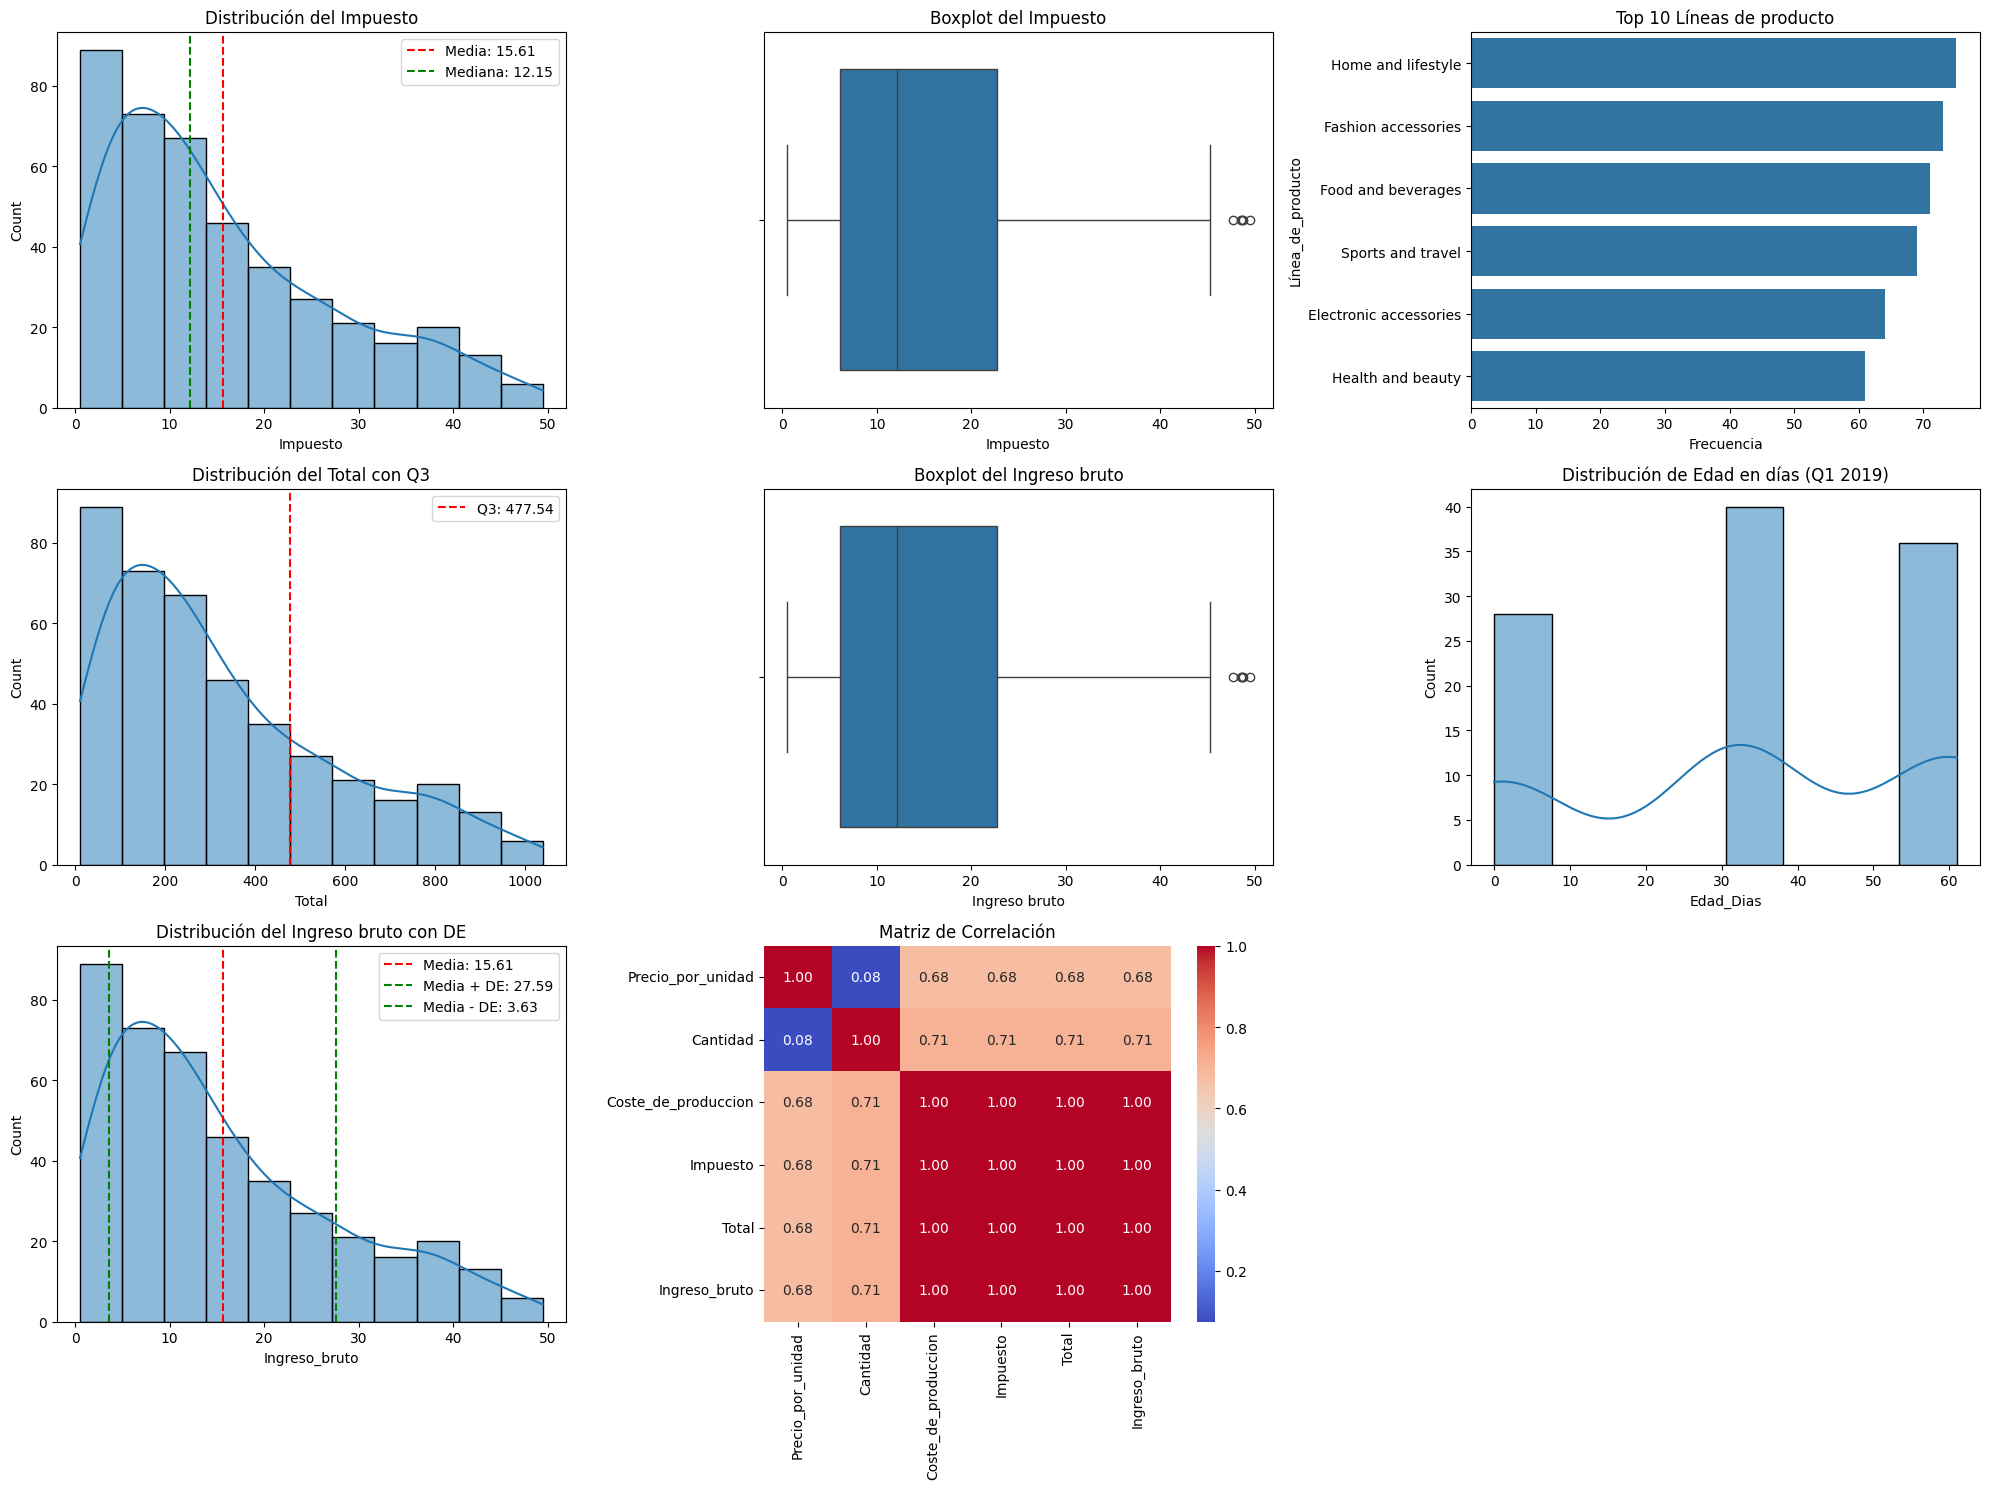

In [ ]:
# Gráficos para visualizar los resultados
plt.figure(figsize=(20, 15))

# 1. Histograma y media del impuesto
plt.subplot(3, 3, 1)
sns.histplot(df_clean['Impuesto'], kde=True)
plt.axvline(media_impuesto, color='r', linestyle='--', label=f'Media: {media_impuesto:.2f}')
plt.axvline(mediana_impuesto, color='g', linestyle='--', label=f'Mediana: {mediana_impuesto:.2f}')
plt.title('Distribución del Impuesto')
plt.legend()

# 2. Mediana del impuesto (boxplot)
plt.subplot(3, 3, 2)
sns.boxplot(x=df_clean['Impuesto'])
plt.title('Boxplot del Impuesto')
plt.xlabel('Impuesto')

# 3. Moda de Línea de producto
plt.subplot(3, 3, 3)
top_lineas = df_clean['Linea_de_producto'].value_counts().head(10)
sns.barplot(y=top_lineas.index, x=top_lineas.values)
plt.title('Top 10 Líneas de producto')
plt.xlabel('Frecuencia')
plt.ylabel('Línea_de_producto')

# 4. Tercer cuartil del Total
plt.subplot(3, 3, 4)
sns.histplot(df_clean['Total'], kde=True)
plt.axvline(q3_total, color='r', linestyle='--', label=f'Q3: {q3_total:.2f}')
plt.title('Distribución del Total con Q3')
plt.legend()

# 5. Rango intercuartil del Ingreso bruto
plt.subplot(3, 3, 5)
sns.boxplot(x=df_clean['Ingreso_bruto'])
plt.title('Boxplot del Ingreso bruto')
plt.xlabel('Ingreso bruto')

# 6. Distribución de Edad_Dias para Q1 2019
plt.subplot(3, 3, 6)
if len(df_q1_2019) > 0:
    sns.histplot(df_q1_2019['Edad_Dias'], kde=True)
    plt.title('Distribución de Edad en días (Q1 2019)')
else:
    plt.text(0.5, 0.5, "No hay datos para Q1 2019", horizontalalignment='center')
    plt.title('Q1 2019 - Sin datos')

# 7. Desviación estándar del Ingreso bruto
plt.subplot(3, 3, 7)
sns.histplot(df_clean['Ingreso_bruto'], kde=True)
media_ingreso = df_clean['Ingreso_bruto'].mean()
plt.axvline(media_ingreso, color='r', linestyle='--', label=f'Media: {media_ingreso:.2f}')
plt.axvline(media_ingreso + desv_est_ingreso, color='g', linestyle='--',
            label=f'Media + DE: {media_ingreso + desv_est_ingreso:.2f}')
plt.axvline(media_ingreso - desv_est_ingreso, color='g', linestyle='--',
            label=f'Media - DE: {media_ingreso - desv_est_ingreso:.2f}')
plt.title('Distribución del Ingreso bruto con DE')
plt.legend()

# Matriz de correlación
plt.subplot(3, 3, 8)
columnas_corr = ['Precio_por_unidad', 'Cantidad', 'Coste_de_produccion', 'Impuesto', 'Total', 'Ingreso_bruto']
corr = df_clean[columnas_corr].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')

plt.tight_layout()
plt.show()